# Happiness and Freedom

**A brief review of the World Happiness Report and Human Freedom Index in terms of how presence of freedom affects happiness.**  

Analysis derived from data using the most recent World Happiness Report ([link](http://worldhappiness.report/)) and Human Freedom Index ([link](https://www.cato.org/human-freedom-index-new)).

"The secret to happiness is freedom... and the secret to freedom is courage." - Thucydides ([wikipedia](https://en.wikipedia.org/wiki/Thucydides))

It's obvious that freedoms and individual liberties contribute positive and strongly toward an individual's general sense of happiness.  We will examine how strong this correlation is and extend the examination to the top level categories of freedom as described by the HFI (Human Freedom Index) and the WHR (World Happiness Report)  The aim is to create an overview of the two datasets, their relationship, and find strongly correlated categories from the two datasets.  Additionally, we want to see how geographic isolation and political restriction of movement affect happiness scores.

#### General Observations

* Freedom is positively correlated with happiness.  (A gut check)
* How do the top and bottom 10 countries compare in happiness to freedom?

#### Human Freedom Index Overview

* How do the two main categories of freedom (personal and economic) affect happiness and how does it differ in that effect?
* Examining the subcategories of personal freedom (top level).
* Examining the subcategories of economic freedom (top level).

#### World Happiness Report Overview

* How is each category related to overall happiness and rank?
* How does each correlate to the strongest freedom category?

#### Happiness in relation to individual freedom of movement

* How does freedom of movement affect happiness?  Individuals that can move freely should be more happy than those under more restrictions.
* How does gender affect freedom of movement?  Does gender play a role in in freedom of movement.  How does this affect happiness?

#### Happiness and relative geographic isolation

* How does geographic isolation relate to happiness?  Are people in landlocked countries less happy than those in coastal countries?
* How does geographic isolation relate to freedom of movement?  Are people in landlocked countries or coastal countries more free to move around?

**To run this project, it is recommend to use Restart & Run All from the Kernel dropdown menu**

In [1]:
# imports
import sqlite3
import sqlalchemy as sa
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from scipy.stats import linregress

# create sqlite database and path
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Happiness_Freedom.db')

# set seaborn default theme
sns.set_palette("muted")

# multiple outputs from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# create dataframes for each report from csv

# Human Freedom Index 
hfi_file = pd.read_csv("hfi_cc_2018.csv")
hfi = pd.DataFrame(hfi_file)

# World Happiness Report
whr_file = pd.read_csv("whr_2017.csv")
whr = pd.DataFrame(whr_file)

# create database and tables from dataframe
hfi.to_sql("Human Freedom Index", con=engine, if_exists="replace")
whr.to_sql("World Happiness Report", con=engine, if_exists="replace")

### General Observations

#### Happiness is directly correlated with freedom

Let's start with a quick sanity check and make sure the happiness and freedom have a strong positive relationship.

Text(0.5,1,'Correlation of Happiness and Freedom')

Freedom and Happiness


LinregressResult(slope=0.6867913461953111, intercept=0.6236133610477834, rvalue=0.6330361581269445, pvalue=1.7569182578216024e-16, stderr=0.07282491965464152)

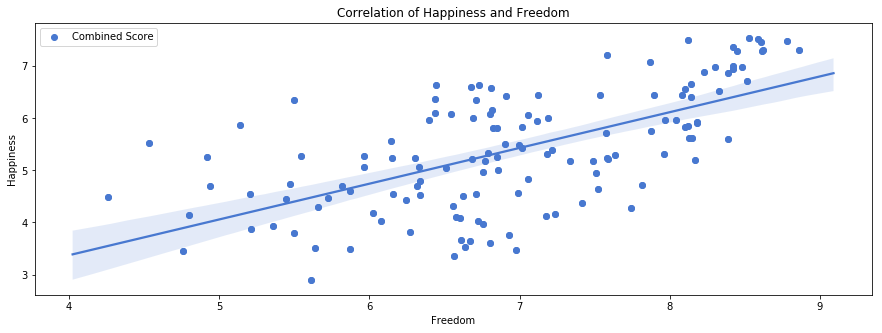

In [3]:
# get overall freedom score by country from Human Freedom Index
hf_score_by_country_data = """
    SELECT 
        countries AS Country, 
        hf_score AS Freedom 
    FROM 'Human Freedom Index'
"""

hf_score_by_country_raw = pd.read_sql(hf_score_by_country_data, con=engine)
hf_score_by_country = hf_score_by_country_raw.dropna()

# get overall happiness score by country from World Happiness Report
whr_data = """
    SELECT 
        Country, 
        [Happiness.Score] AS 'Happiness' 
    FROM 'World Happiness Report' 
    GROUP BY Country 
    ORDER BY 'Happiness' DESC
"""

whr_raw = pd.read_sql(whr_data, con=engine)
whr = whr_raw.dropna()

# combine the two dataframes and group by country
reports_combined = pd.concat([hf_score_by_country, whr], sort=False)
reports_grouped = reports_combined.groupby("Country")["Freedom", "Happiness"].mean()
hf_wh_scores = reports_grouped.dropna()
hf_wh_scores.columns = ["Freedom", "Happiness"]
hf_wh_scores.index.name = "Country"

# Scatter/regression plot of happiness vs freedom
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="Freedom", y="Happiness", data=hf_wh_scores)
points = plt.scatter(hf_wh_scores["Freedom"], hf_wh_scores["Happiness"], label="Combined Score")
ax.set_title("Correlation of Happiness and Freedom")
ax.legend();

print("Freedom and Happiness")
x = hf_wh_scores["Freedom"]
y = hf_wh_scores["Happiness"]
linregress(x,y)

As expected, reported happiness and freedom have a moderate positive correlation in a linear fashion.

Slope = 0.69  
Correlation Coefficient = 0.63

#### How the top and bottom 10 countries compare in happiness to freedom

Let's look at how the top 10 and bottom 10 countries compare in level of happiness.

So that we can consider both the overall happiness and freedom scores for each country, we will create a Happiness/Freedom Index by averaging the 2 scores for each country.

Text(0.5,1,'Top 10 HFI Countries')

[Text(0,0,'Norway'),
 Text(0,0,'Denmark'),
 Text(0,0,'Iceland'),
 Text(0,0,'Switzerland'),
 Text(0,0,'Finland'),
 Text(0,0,'Netherlands'),
 Text(0,0,'Canada'),
 Text(0,0,'New Zealand'),
 Text(0,0,'Australia')]

Text(0,0.5,'HFI Score')

(0, 10)

Text(0.5,1,'Bottom 10 HFI Countries')

[Text(0,0,'Madagascar'),
 Text(0,0,'Haiti'),
 Text(0,0,'Liberia'),
 Text(0,0,'Guinea'),
 Text(0,0,'Togo'),
 Text(0,0,'Rwanda'),
 Text(0,0,'Syria'),
 Text(0,0,'Tanzania'),
 Text(0,0,'Burundi')]

Text(0,0.5,'HFI Score')

(0, 10)

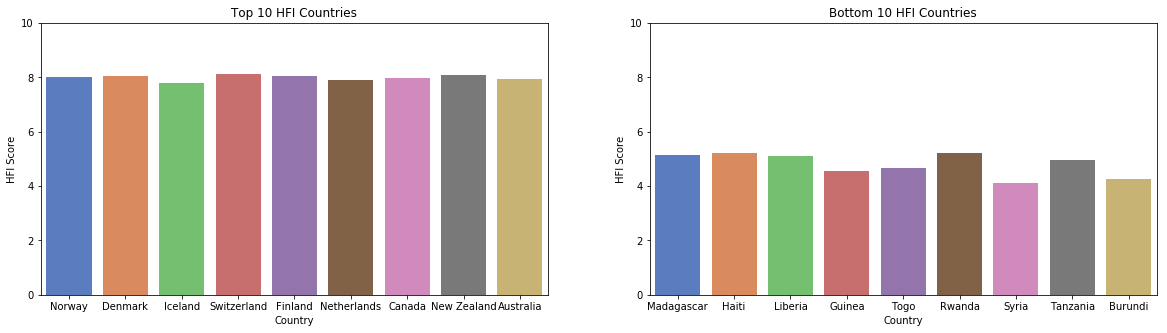

In [4]:
# reset index adn sort by happiness score
hf_wh_scores_reset = hf_wh_scores.reset_index()
hf_wh_scores_by_country_raw = hf_wh_scores_reset.sort_values(by=['Happiness'], ascending=False)
hf_wh_scores_by_country_raw["Combined Score"] = hf_wh_scores_by_country_raw.mean(axis=1)

# get top 10 and bottom 10 rows and round score
hf_wh_scores_by_country_top = hf_wh_scores_by_country_raw[:9].round(2)
hf_wh_scores_by_country_bottom = hf_wh_scores_by_country_raw[-9:].round(2)

# plot bar graph for each category
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1 = sns.barplot(x="Country", y="Combined Score", data=hf_wh_scores_by_country_top, ax=ax1)
ax2 = sns.barplot(x="Country", y="Combined Score", data=hf_wh_scores_by_country_bottom, ax=ax2)
ax1.set_title("Top 10 HFI Countries")
ax1.set_xticklabels(hf_wh_scores_by_country_top["Country"])
ax1.set_ylabel("HFI Score")
ax1.set_ylim(0,10)
ax2.set_title("Bottom 10 HFI Countries")
ax2.set_xticklabels(hf_wh_scores_by_country_bottom["Country"])
ax2.set_ylabel("HFI Score")
ax2.set_ylim(0,10)

The top 10 countries combined scores are grouped tightly together hovering around 8 out of 10.

The bottom 10 countries combined scores show a little more variability ranging between 4 and 6 out of 10.

## Human Freedom Index Overview

#### Happiness in relation to  personal and economic freedom

How does personal freedom affect happiness?

How does economic freedom affect happiness?

In [5]:
# get personal and economic freedom scores by country from World Freedom Report
pf_ef_score_by_country_data = """
    SELECT 
        countries AS 'Country', 
        pf_score AS 'Personal Freedom', 
        ef_score AS 'Economic Freedom' 
    FROM 'Human Freedom Index'
"""

pf_ef_score_by_country_raw = pd.read_sql(pf_ef_score_by_country_data, con=engine)

# coombine the two dataframes
reports_combined = pd.concat([pf_ef_score_by_country_raw, whr], sort=False)
reports_grouped = reports_combined.groupby("Country")["Personal Freedom", "Economic Freedom", "Happiness"].mean()
pf_ef_scores = reports_grouped.dropna()

Text(0.5,1,'Happiness and Personal Freedom')

Text(0.5,1,'Happiness and Economic Freedom')

Personal Freedom


LinregressResult(slope=0.4792994286254869, intercept=1.9771523039640249, rvalue=0.5904565197157343, pvalue=4.8011190014548e-14, stderr=0.05680729070605633)

Economic Freedom


LinregressResult(slope=0.7572594668852657, intercept=0.2776175122816644, rvalue=0.5769568558547652, pvalue=2.4067155502762765e-13, stderr=0.09295607741457271)

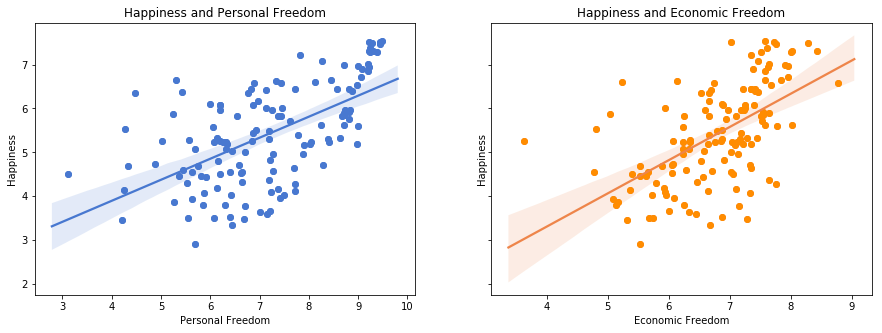

In [6]:
# regplot of happiness, personal freedom and economic freedom scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.regplot(x="Personal Freedom", y="Happiness", data=pf_ef_scores, ax=ax1)
sns.regplot(x="Economic Freedom", y="Happiness", data=pf_ef_scores, ax=ax2)
points1 = ax1.scatter(pf_ef_scores["Personal Freedom"], pf_ef_scores["Happiness"], label="Happiness and Personal Freedom")
points2 = ax2.scatter(pf_ef_scores["Economic Freedom"], pf_ef_scores["Happiness"], c="darkorange", label="Happiness and Economic Freedom") # color property necessary since default is used in first plot
ax1.set_title("Happiness and Personal Freedom")
ax2.set_title("Happiness and Economic Freedom")

x = pf_ef_scores["Personal Freedom"]
y = pf_ef_scores["Happiness"]
print("Personal Freedom")
linregress(x,y)

print("Economic Freedom")
x = pf_ef_scores["Economic Freedom"]
y = pf_ef_scores["Happiness"]
linregress(x,y)

__Personal Freedom:__  
Slope = 0.48  
Correlation Coefficient = 0.59  

__Economic Freedom__:  
Slope = 0.78  
Correlation Coefficient = 0.58  

Both categories show a moderate to strong positive linear relationship.  

Economic freedom seems to be slightly more important than personal freedom though the overall range of each category is equal.  

Economic freedoms include property rights, international trade regulations, and size of government.


#### Personal Freedom Subcategories


Text(0.5,0.98,'Happiness and Personal Freedoms')

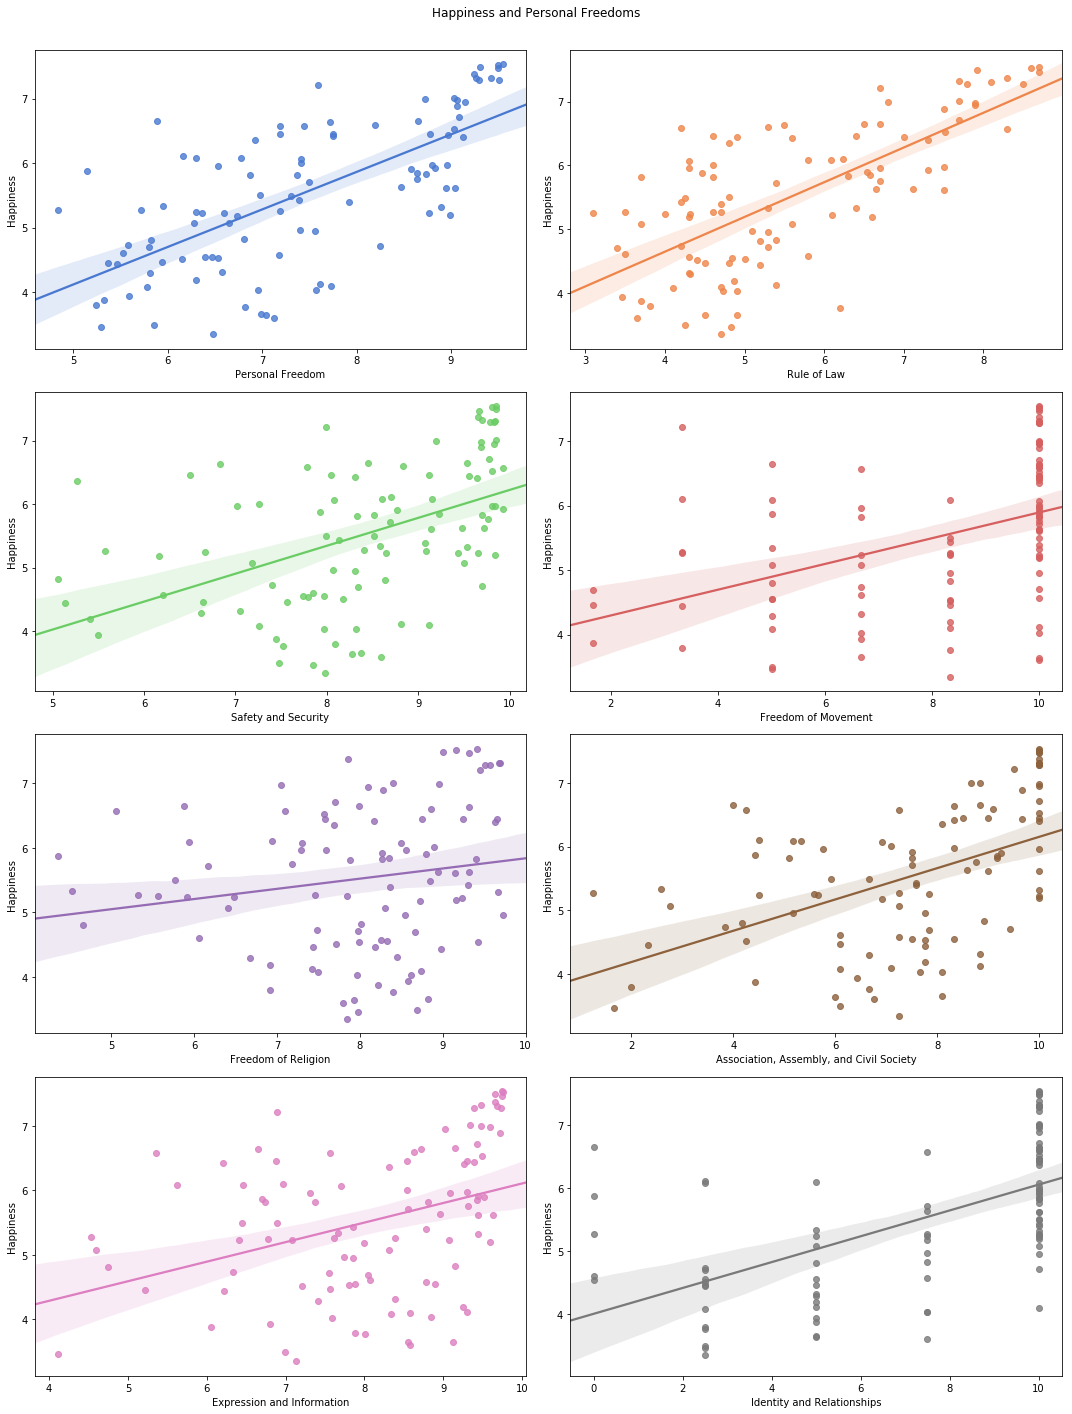

In [7]:
# Each personal freedom top level category
hfi_pf_top_raw = """
    SELECT 
        countries AS Country, 
        hf_score AS 'Freedom Score', 
        pf_score AS 'Personal Freedom', 
        pf_rol AS 'Rule of Law', 
        pf_ss AS 'Safety and Security', 
        pf_movement AS 'Freedom of Movement', 
        pf_religion AS 'Freedom of Religion', 
        pf_association AS 'Association, Assembly, and Civil Society', 
        pf_expression AS 'Expression and Information', 
        pf_identity AS 'Identity and Relationships' 
    FROM 'Human Freedom Index' 
    GROUP BY Country 
    ORDER BY ef_score DESC
"""

hfi_pf_top_data = pd.read_sql(hfi_pf_top_raw, con=engine)
hfi_pf_top = hfi_pf_top_data.dropna()

# coombine the two dataframes grouping by county and dropping null values
hfi_pf_top_whr_combined = pd.concat([hfi_pf_top, whr], sort=True)
hfi_pf_top_whr_grouped = hfi_pf_top_whr_combined.groupby("Country")["Happiness", "Freedom Score", "Personal Freedom", "Rule of Law", "Safety and Security", "Freedom of Movement", "Freedom of Religion", "Association, Assembly, and Civil Society", "Expression and Information", "Identity and Relationships"].mean()
hfi_pf_top_whr_cleaned = hfi_pf_top_whr_grouped.dropna()
hfi_pf_top_whr = hfi_pf_top_whr_cleaned.reset_index()

# plot of happiness and personal freedom subtypes
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Happiness and Personal Freedoms")
sns.regplot(x="Personal Freedom", y="Happiness", data=hfi_pf_top_whr, ax=axes[0,0])
sns.regplot(x="Rule of Law", y="Happiness", data=hfi_pf_top_whr, ax=axes[0,1])
sns.regplot(x="Safety and Security", y="Happiness", data=hfi_pf_top_whr, ax=axes[1,0])
sns.regplot(x="Freedom of Movement", y="Happiness", data=hfi_pf_top_whr, ax=axes[1,1])
sns.regplot(x="Freedom of Religion", y="Happiness", data=hfi_pf_top_whr, ax=axes[2,0])
sns.regplot(x="Association, Assembly, and Civil Society", y="Happiness", data=hfi_pf_top_whr, ax=axes[2,1])
sns.regplot(x="Expression and Information", y="Happiness", data=hfi_pf_top_whr, ax=axes[3,0])
sns.regplot(x="Identity and Relationships", y="Happiness", data=hfi_pf_top_whr, ax=axes[3,1])

plt.tight_layout()
fig.subplots_adjust(top=0.95)


In [8]:
# slope and correlation coefficient of happiness and personal freedom
print("Freedom")
x = hfi_pf_top_whr["Personal Freedom"]
y = hfi_pf_top_whr["Happiness"]
linregress(x,y)

# slope and correlation coefficient of happiness and rule of law
print("Rule of Law")
x = hfi_pf_top_whr["Rule of Law"]
y = hfi_pf_top_whr["Happiness"]
linregress(x,y)

# slope and correlation coefficient of happiness and safety and security
print("Safety & Security")
x = hfi_pf_top_whr["Safety and Security"]
y = hfi_pf_top_whr["Happiness"]
linregress(x,y)

# slope and correlation coefficient of happiness and movement
print("Freedom of Movement")
x = hfi_pf_top_whr["Freedom of Movement"]
y = hfi_pf_top_whr["Happiness"]
linregress(x,y)

# slope and correlation coefficient of happiness and religion
print("Freedom of Religion")
x = hfi_pf_top_whr["Freedom of Religion"]
y = hfi_pf_top_whr["Happiness"]
linregress(x,y)

# slope and correlation coefficient of happiness and association, assembly, and civil society
print("Assocaition, Assembly, & Civil Society")
x = hfi_pf_top_whr["Association, Assembly, and Civil Society"]
y = hfi_pf_top_whr["Happiness"]
linregress(x,y)

# slope and correlation coefficient of happiness and expression and information
print("Expression and Information")
x = hfi_pf_top_whr["Expression and Information"]
y = hfi_pf_top_whr["Happiness"]
linregress(x,y)

# slope and correlation coefficient of happiness and identity and relationships
print("Identity & Relationships")
x = hfi_pf_top_whr["Identity and Relationships"]
y = hfi_pf_top_whr["Happiness"]

linregress(x,y)

Freedom


LinregressResult(slope=0.5814124097219735, intercept=1.2128124812139918, rvalue=0.6796530299061834, pvalue=5.526542422314027e-15, stderr=0.06306661792937004)

Rule of Law


LinregressResult(slope=0.5450457875250867, intercept=2.463928756245908, rvalue=0.7125829208796739, pvalue=6.430467284276018e-17, stderr=0.053933930508916504)

Safety & Security


LinregressResult(slope=0.4391436470375125, intercept=1.8311487916803557, rvalue=0.4912612471714451, pvalue=1.8260003317276716e-07, stderr=0.07825296053662638)

Freedom of Movement


LinregressResult(slope=0.19963584697125336, intercept=3.8975658646616758, rvalue=0.4306623921212491, pvalue=6.943604677624239e-06, stderr=0.042047240372496734)

Freedom of Religion


LinregressResult(slope=0.15792119600215368, intercept=4.260769947245106, rvalue=0.17445284501361022, pvalue=0.08101748840914523, stderr=0.0895846302222597)

Assocaition, Assembly, & Civil Society


LinregressResult(slope=0.24592654121454077, intercept=3.696135379604434, rvalue=0.48531335162858075, pvalue=2.693848183939597e-07, stderr=0.044529319532895406)

Expression and Information


LinregressResult(slope=0.30322577109867405, intercept=3.0752598688061763, rvalue=0.36885038655365043, pvalue=0.00014734595413788782, stderr=0.07679667561733543)

Identity & Relationships


LinregressResult(slope=0.20475203226041092, intercept=4.004524509650698, rvalue=0.5923752560418506, pvalue=6.791227037048331e-11, stderr=0.027987666745681462)

#### Analysis:

**Strong relationship**: Rule of Law (0.71)

**Weak to moderate**: Saftey & Security (0.48), Movement (0.42), Association, Assembly, and Civil Society (0.38), Expression and Information (0.45), Identity and Relationships (0.46)

**None to weak** Relgion (0.16)

Rule of Law shows to highest correlation with happiness, while all other categories except Religion show a weak to moderate correlation to happiness. Rule of law includes personal protections, civil liberties, and freedom from "coerion by others".

#### Economic Freedom Subcategories

Text(0.5,0.98,'Happiness and Economic Freedoms')

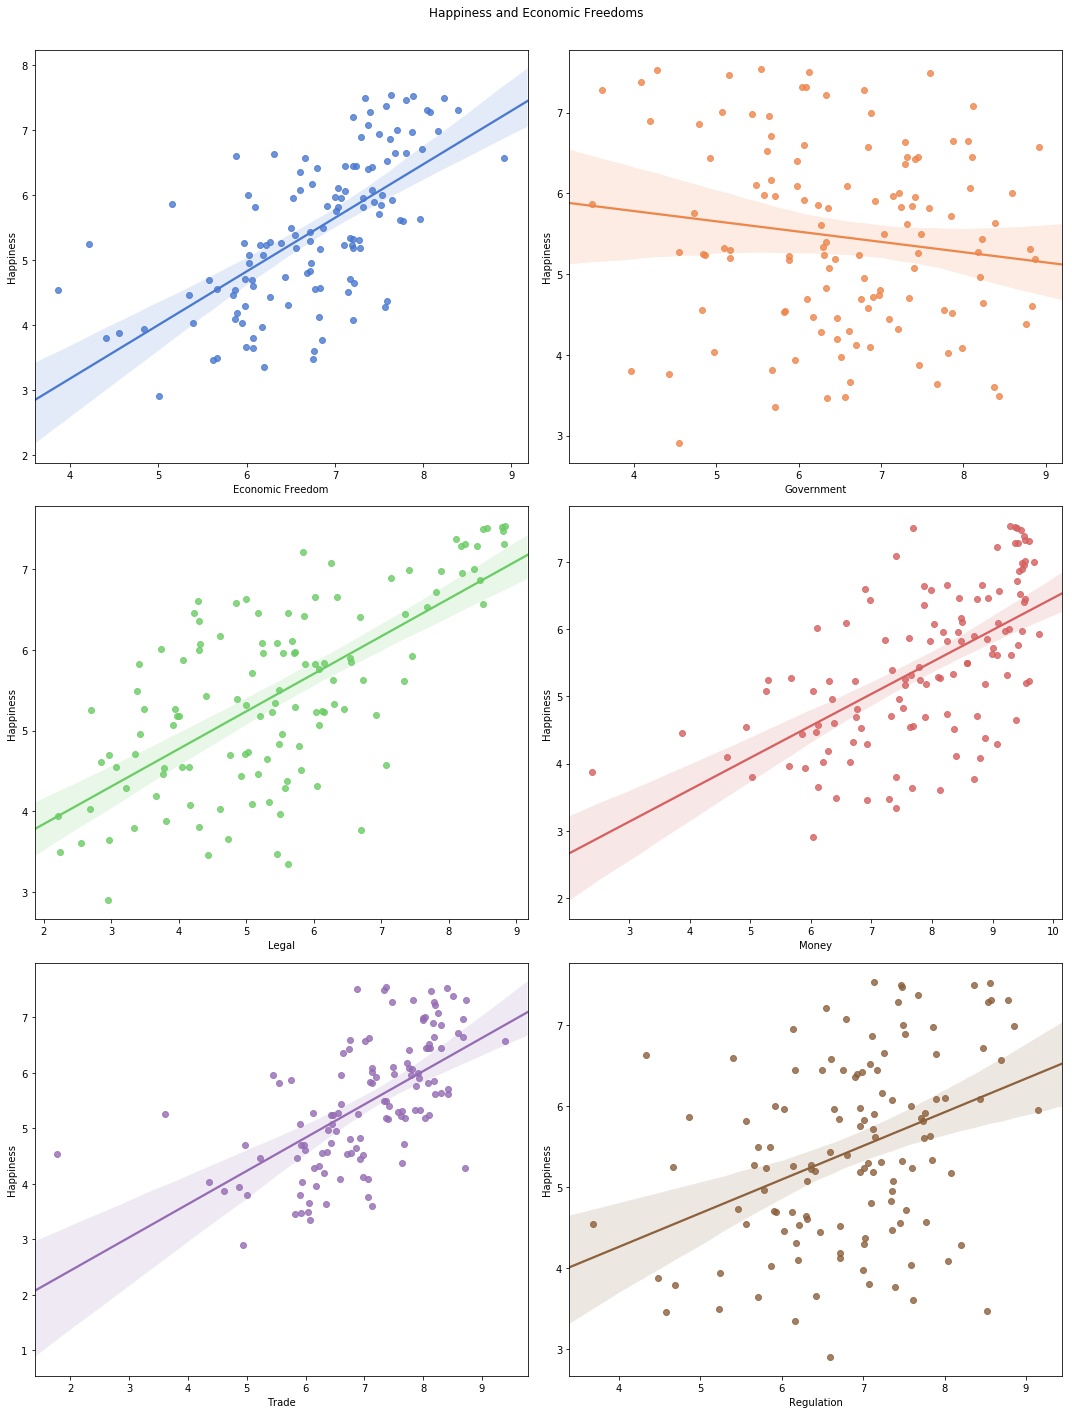

In [9]:
# Each economic freedom top level category
hfi_ef_top_raw = """SELECT 
        countries AS Country, 
        hf_score AS 'Freedom Score', 
        ef_score AS 'Economic Freedom', 
        ef_government AS 'Government', 
        ef_legal AS 'Legal', 
        ef_money AS 'Money', 
        ef_trade AS 'Trade', 
        ef_regulation AS 'Regulation' 
    FROM 'Human Freedom Index' 
    GROUP BY Country 
    ORDER BY ef_score DESC
"""

hfi_ef_top_data = pd.read_sql(hfi_ef_top_raw, con=engine)
hfi_ef_top = hfi_ef_top_data.dropna()

# coombine the two dataframes grouping by county and dropping null values
hfi_top_whr_combined = pd.concat([hfi_ef_top, whr], sort=True)
hfi_top_whr_grouped = hfi_top_whr_combined.groupby("Country")["Happiness", "Economic Freedom", "Government", "Legal", "Money", "Trade", "Regulation"].mean()
hfi_top_whr_cleaned = hfi_top_whr_grouped.dropna()
hfi_top_whr = hfi_top_whr_cleaned.reset_index()

# plot of happiness and personal freedom subtypes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
fig.suptitle("Happiness and Economic Freedoms")
sns.regplot(x="Economic Freedom", y="Happiness", data=hfi_top_whr, ax=axes[0,0])
sns.regplot(x="Government", y="Happiness", data=hfi_top_whr, ax=axes[0,1])
sns.regplot(x="Legal", y="Happiness", data=hfi_top_whr, ax=axes[1,0])
sns.regplot(x="Money", y="Happiness", data=hfi_top_whr, ax=axes[1,1])
sns.regplot(x="Trade", y="Happiness", data=hfi_top_whr, ax=axes[2,0])
sns.regplot(x="Regulation", y="Happiness", data=hfi_top_whr, ax=axes[2,1])

plt.tight_layout()
fig.subplots_adjust(top=0.95)


In [10]:
# slope and correlation coefficient of happiness and economic freedom
print("Economic Freedom")
x = hfi_top_whr["Economic Freedom"]
y = hfi_top_whr["Happiness"]
linregress(x,y)

print("Government")
x = hfi_top_whr["Government"]
y = hfi_top_whr["Happiness"]
linregress(x,y)

print("Legal")
x = hfi_top_whr["Legal"]
y = hfi_top_whr["Happiness"]
linregress(x,y)

print("Money")
x = hfi_top_whr["Money"]
y = hfi_top_whr["Happiness"]
linregress(x,y)

print("Trade")
x = hfi_top_whr["Trade"]
y = hfi_top_whr["Happiness"]
linregress(x,y)

print("Regulation")
x = hfi_top_whr["Regulation"]
y = hfi_top_whr["Happiness"]
linregress(x,y)

Economic Freedom


LinregressResult(slope=0.8252860165049533, intercept=-0.125369130354124, rvalue=0.6487565093381257, pvalue=4.899002001742474e-16, stderr=0.08800603945958749)

Government


LinregressResult(slope=-0.12716901696771032, intercept=6.288322154990945, rvalue=-0.13781580946982475, pvalue=0.12848374949408994, stderr=0.08308556895217893)

Legal


LinregressResult(slope=0.46519862682790597, intercept=2.9117443140562242, rvalue=0.6759798258082297, pvalue=9.626889464160156e-18, stderr=0.04610334356071345)

Money


LinregressResult(slope=0.47443422779802824, intercept=1.7149713180785349, rvalue=0.5958237481839898, pvalue=3.6012685190512524e-13, stderr=0.058135763031711134)

Trade


LinregressResult(slope=0.598681547411327, intercept=1.240002949355958, rvalue=0.6118864488088822, pvalue=5.5335784022332636e-14, stderr=0.07035240972763246)

Regulation


LinregressResult(slope=0.4163801998840268, intercept=2.5947683040072294, rvalue=0.3777212648901595, pvalue=1.6546453235592395e-05, stderr=0.09278955881872156)

#### Analysis:

**Strong relationship**: Legal (0.67), Money (0.60), Trade (0.61)

**Weak to moderate**: Regulation (0.38)

**None to weak** Government (0.14)

3 out of the 5 categories show a strong relationship to happiness mirroring the overall effect of economic freedoms on happiness.  Government (size) shows a negative but weak correlation with happiness showing that happiness increases with a decrease in government size.  

Legal (System and Property Rights) include judical enforcement, integrity, and independence.

Money is the integrity of the country's currency.

Trade is freedom to trade internationally and proper regulations.


### Happiness Subcategories

* How is each category related to overall happiness and rank?
* How does each correlate to the strongest freedom category, Rule of Law?

In [11]:
# get top level subcategories from World Happiness Report
whr_subcategories_data = """
    SELECT 
        Country, 
        [Happiness.Score] AS 'Happiness', 
        [Economy..GDP.per.Capita.] AS 'Economy (GDP)', 
        Family, [Health..Life.Expectancy.] AS 'Health & Life Expectancy', 
        Freedom, 
        Generosity, 
        [Trust..Government.Corruption.] AS 'Trust Government/Corruption', 
        [Dystopia.Residual] AS 'Dystopia Residual' 
    FROM 'World Happiness Report' 
    GROUP BY Country
"""

# pull data from table and drop N/A values
whr_subcategories_raw = pd.read_sql(whr_subcategories_data, con=engine)
whr_subcategories = whr_subcategories_raw.dropna()

Text(0.5,0.98,'Happiness and Categories of Happiness')

Text(0,0.5,'Happiness')

Text(0.5,0,'Economy (GDP)')

Text(0,0.5,'Happiness')

Text(0.5,0,'Family')

Text(0,0.5,'Happiness')

Text(0.5,0,'Health & Life Expectancy')

Text(0,0.5,'Happiness')

Text(0.5,0,'Freedom')

Text(0,0.5,'Happiness')

Text(0.5,0,'Generosity')

Text(0.5,0,'Trust Government/Corruption')

Text(0,0.5,'Happiness')

Text(0.5,0,'Dystopia Residual')

Text(0,0.5,'Happiness')

(0.03676434140336969, 1.9365936848606855, 5.059548291206361, 5.648490420341491)

Economy (GDP)


LinregressResult(slope=2.1841849463496823, intercept=3.2032126826861878, rvalue=0.812468753886642, pvalue=1.1103905896573228e-37, stderr=0.1267094804726199)

Family


LinregressResult(slope=2.96424751523216, intercept=1.8298321531238804, rvalue=0.7527366726961481, pvalue=1.4163391139614235e-29, stderr=0.20958677033185413)

Health & Life Expectancy


LinregressResult(slope=3.731201709128992, intercept=3.2968556853783144, rvalue=0.7819506247990082, pvalue=3.2129704689696394e-33, stderr=0.24046337464539952)

Freedom


LinregressResult(slope=4.2997863418550235, intercept=3.5963270129355083, rvalue=0.5701371935975075, pvalue=9.68789889785894e-15, stderr=0.5009051793321111)

Generosity


LinregressResult(slope=1.3030836194209647, intercept=5.032309548004588, rvalue=0.1552558391127447, pvalue=0.053732504079261965, stderr=0.6703171217895821)

Trust Government/Corruption


LinregressResult(slope=4.774591796345779, intercept=4.766170560287328, rvalue=0.42907973722217196, pvalue=2.538310699741571e-08, stderr=0.8125844091082511)

Dystopia Residual


LinregressResult(slope=1.0754110388489102, intercept=3.364253195122525, rvalue=0.4753551243132996, pvalue=4.102379868569846e-10, stderr=0.16091317244367698)

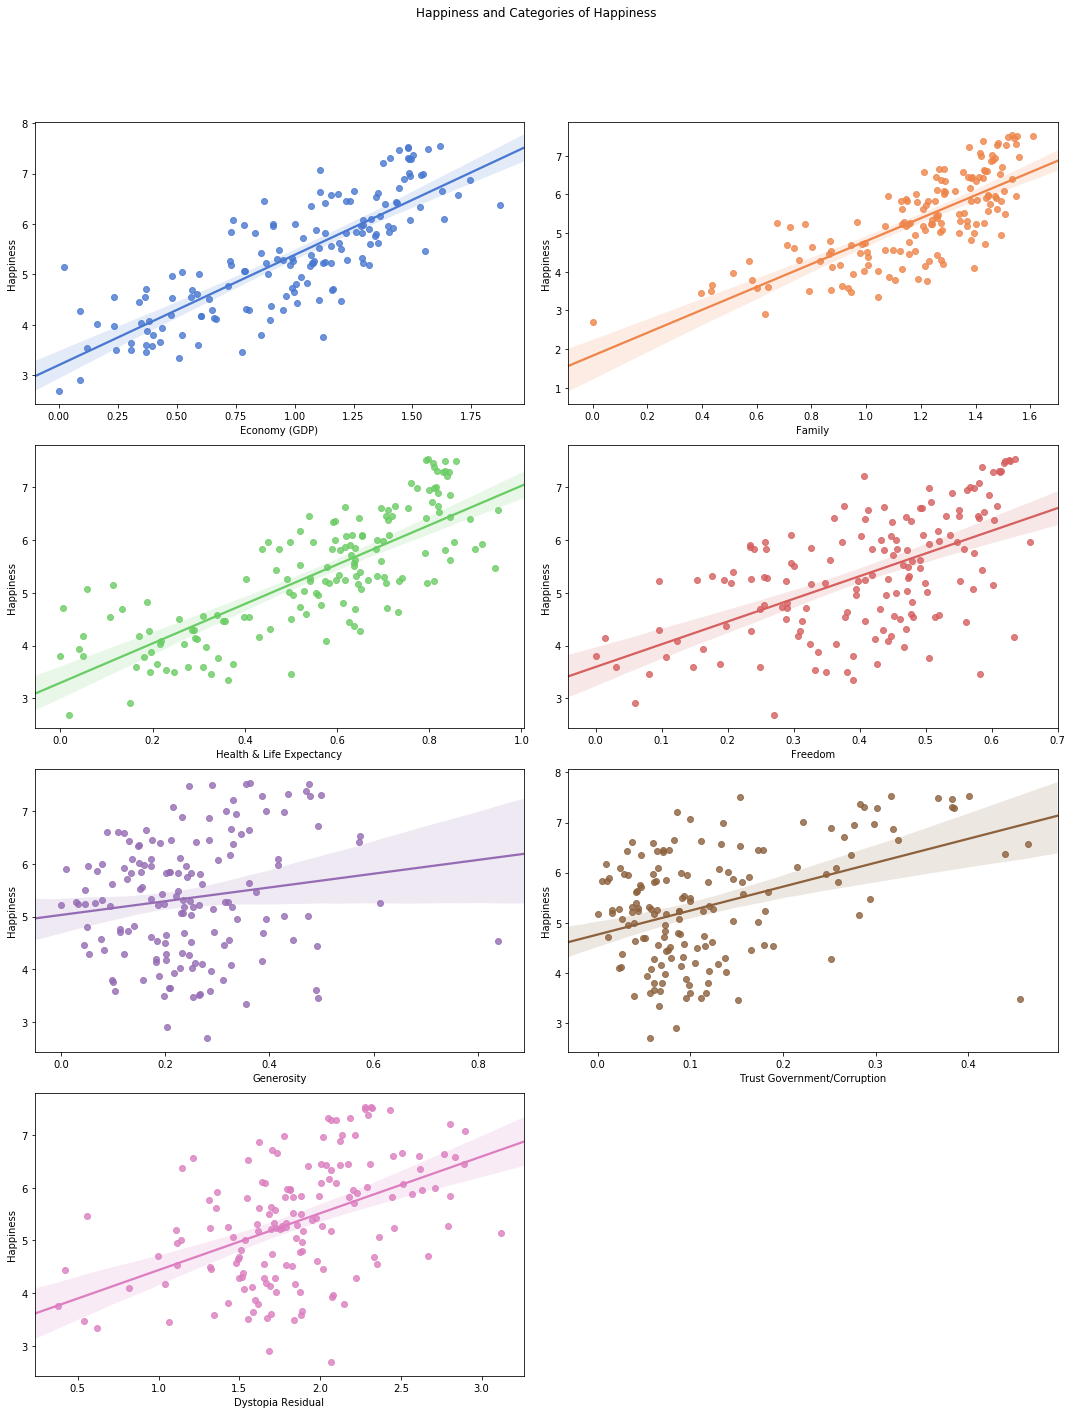

In [12]:
# plot of happiness and subtypes
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Happiness and Categories of Happiness")

sns.regplot(x="Economy (GDP)", y="Happiness", data=whr_subcategories, ax=axes[0,0])
sns.regplot(x="Family", y="Happiness", data=whr_subcategories, ax=axes[0,1])

axes[0,0].set_ylabel("Happiness")
axes[0,0].set_xlabel("Economy (GDP)")
axes[0,1].set_ylabel("Happiness")
axes[0,1].set_xlabel("Family")

sns.regplot(x="Health & Life Expectancy", y="Happiness", data=whr_subcategories, ax=axes[1,0])
sns.regplot(x="Freedom", y="Happiness", data=whr_subcategories, ax=axes[1,1])

axes[1,0].set_ylabel("Happiness")
axes[1,0].set_xlabel("Health & Life Expectancy")
axes[1,1].set_ylabel("Happiness")
axes[1,1].set_xlabel("Freedom")

sns.regplot(x="Generosity", y="Happiness", data=whr_subcategories, ax=axes[2,0])
sns.regplot(x="Trust Government/Corruption", y="Happiness", data=whr_subcategories, ax=axes[2,1])

axes[2,0].set_ylabel("Happiness")
axes[2,0].set_xlabel("Generosity")
axes[2,1].set_xlabel("Trust Government/Corruption")
axes[2,1].set_ylabel("Happiness")

sns.regplot(x="Dystopia Residual", y="Happiness", data=whr_subcategories, ax=axes[3,0])

axes[3,0].set_xlabel("Dystopia Residual")
axes[3,0].set_ylabel("Happiness")
axes[3,1].axis("off") 

plt.tight_layout()
fig.subplots_adjust(top=0.9)

# slope and correlation coefficient of happiness and personal freedom
print("Economy (GDP)")
x = whr_subcategories["Economy (GDP)"]
y = whr_subcategories["Happiness"]
linregress(x,y)

print("Family")
x = whr_subcategories["Family"]
y = whr_subcategories["Happiness"]
linregress(x,y)

print("Health & Life Expectancy")
x = whr_subcategories["Health & Life Expectancy"]
y = whr_subcategories["Happiness"]
linregress(x,y)

print("Freedom")
x = whr_subcategories["Freedom"]
y = whr_subcategories["Happiness"]
linregress(x,y)

print("Generosity")
x = whr_subcategories["Generosity"]
y = whr_subcategories["Happiness"]
linregress(x,y)

print("Trust Government/Corruption")
x = whr_subcategories["Trust Government/Corruption"]
y = whr_subcategories["Happiness"]
linregress(x,y)

print("Dystopia Residual")
x = whr_subcategories["Dystopia Residual"]
y = whr_subcategories["Happiness"]
linregress(x,y)

#### Analysis:

**Strong relationship**: Economy(GDP) (0.81), Family (0.75), Health & Life Expectancy (0.78)

**Weak to moderate**: Freedom (0.57), Trust Government/Corruption (0.43), Dystopia Residual (0.48)

**None to weak** Generosity (0.16)

Happiness seems to be dominated by Economy, Family, and Health & Life Expectancy while the WHR's own freedom category is only moderately correlated with happiness.

Let's look at how the strongest personal freedom correlate (Rule of Law) is correlated with the happiness subcategories.

In [13]:
# combine Rule of Law from HFI with Happiness 

# retrieve movement data from Human Freedom Index grouped by country and ordered by movement score
hfi_rol_data = """
    SELECT 
        countries AS Country, 
        pf_rol AS 'Rule of Law' 
    FROM 'Human Freedom Index' 
    GROUP BY Country 
    ORDER BY pf_score DESC
"""

# pull data from table and drop N/A values
hfi_rol_raw = pd.read_sql(hfi_rol_data, con=engine)
hfi_rol_by_country = hfi_rol_raw.dropna()

# combine the two dataframes grouping by county and dropping null values
hfi_rol_whr_happiness_subcategories_combined = pd.concat([hfi_rol_by_country, whr_subcategories], sort=True)
hfi_rol_whr_happiness_subcategories_grouped = hfi_rol_whr_happiness_subcategories_combined.groupby("Country")["Rule of Law","Happiness", "Economy (GDP)", "Family", "Health & Life Expectancy", "Freedom", "Generosity", "Trust Government/Corruption", "Dystopia Residual"].mean()
hfi_rol_whr_happiness_subcategories_cleaned = hfi_rol_whr_happiness_subcategories_grouped.dropna()
hfi_rol_whr_happiness_subcategories = hfi_rol_whr_happiness_subcategories_cleaned.reset_index()

Text(0.5,0.98,'Rule of Law and Categories of Happiness')

Text(0,0.5,'Rule of Law')

Text(0.5,0,'Economy (GDP)')

Text(0,0.5,'Rule of Law')

Text(0.5,0,'Family')

Text(0,0.5,'Rule of Law')

Text(0.5,0,'Health & Life Expectancy')

Text(0,0.5,'Rule of Law')

Text(0.5,0,'Freedom')

Text(0.5,0,'Generosity')

Text(0,0.5,'Rule of Law')

Text(0.5,0,'Trust Government/Corruption')

Text(0,0.5,'Rule of Law')

Text(0.5,0,'Dystopia Residual')

Text(0,0.5,'Rule of Law')

(0.034823343379430605,
 1.9628363655579113,
 5.451108352143736,
 5.549423751717509)

Economy (GDP)


LinregressResult(slope=2.6892557262920964, intercept=2.8082722719327946, rvalue=0.7477348693119308, pvalue=2.9193995976361726e-23, stderr=0.21709917389981737)

Family


LinregressResult(slope=3.0766852638919864, intercept=1.8310748354693636, rvalue=0.588171328578403, pvalue=8.479072968901221e-13, stderr=0.38458602697736416)

Health & Life Expectancy


LinregressResult(slope=4.3077575992320485, intercept=3.087573612354114, rvalue=0.6955379006714403, pvalue=4.370220362911217e-19, stderr=0.40453689965676093)

Freedom


LinregressResult(slope=4.921288894322671, intercept=3.4962163257497103, rvalue=0.512641826639606, pvalue=1.3467492749178803e-09, stderr=0.749314810955811)

Generosity


LinregressResult(slope=2.2371511696335427, intercept=4.99374970121637, rvalue=0.22455870817872461, pvalue=0.012524026561410152, stderr=0.8825453115104022)

Trust Government/Corruption


LinregressResult(slope=8.026003340941067, intercept=4.562088101549818, rvalue=0.5816997846772402, pvalue=1.7192247828960777e-12, stderr=1.0202669528923913)

Dystopia Residual


LinregressResult(slope=0.04292047445483731, intercept=5.464470421543883, rvalue=0.01529429561983572, pvalue=0.8666620736168251, stderr=0.2550888927142189)

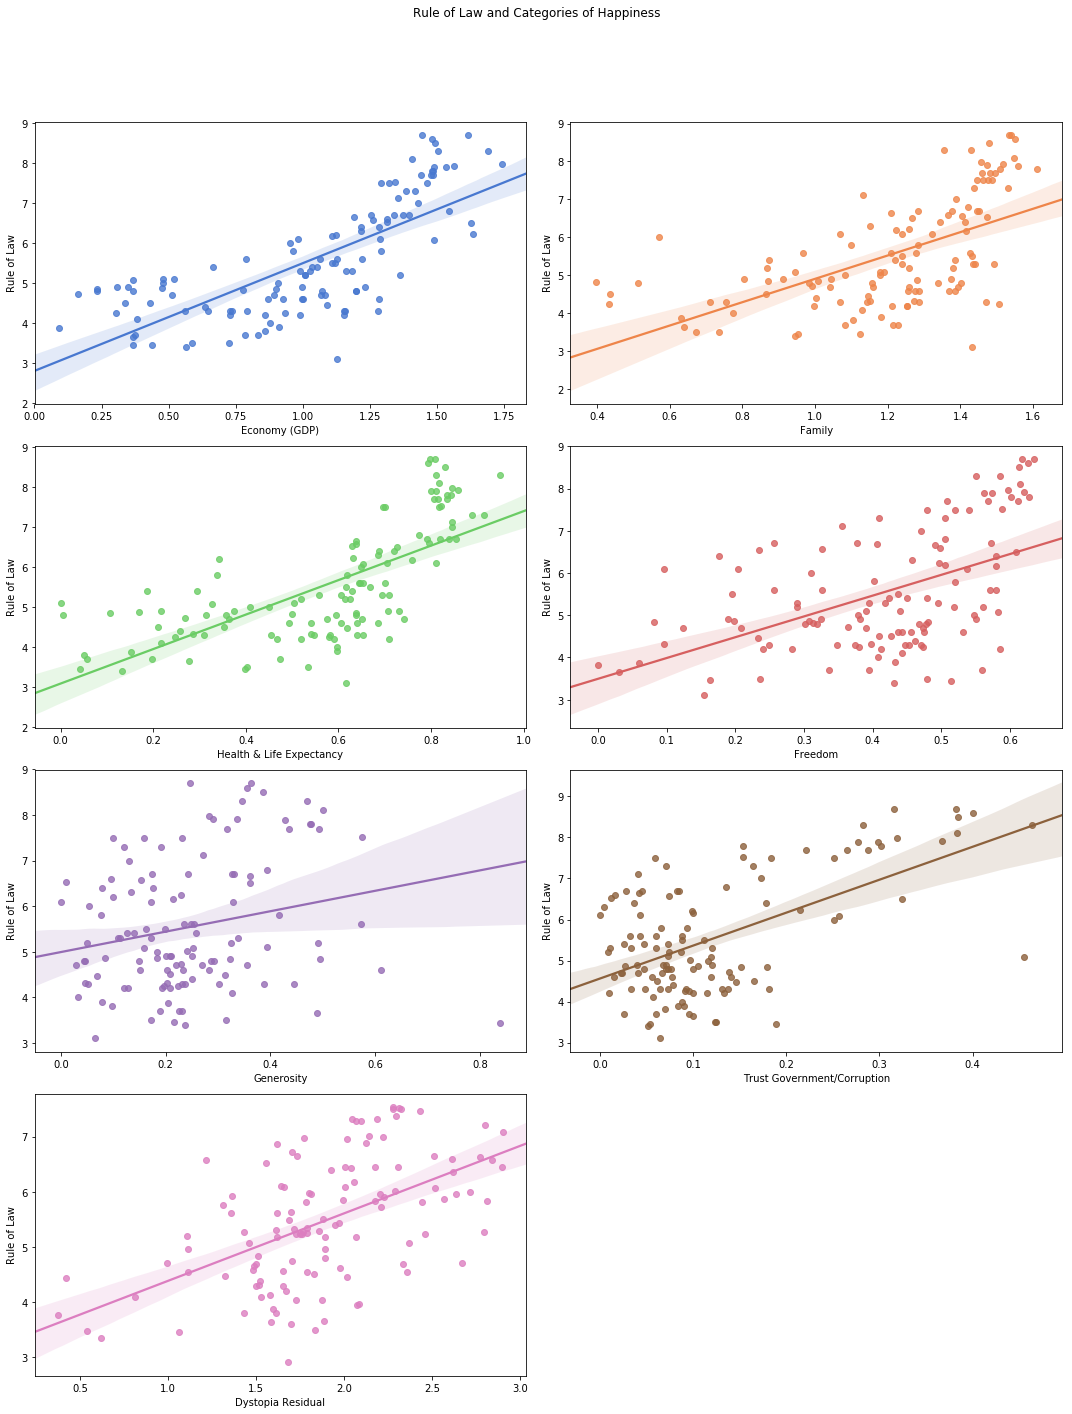

In [14]:
# plot of Rule of Law and Happiness categories
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Rule of Law and Categories of Happiness")

sns.regplot(x="Economy (GDP)", y="Rule of Law", data=hfi_rol_whr_happiness_subcategories, ax=axes[0,0])
sns.regplot(x="Family", y="Rule of Law", data=hfi_rol_whr_happiness_subcategories, ax=axes[0,1])

axes[0,0].set_ylabel("Rule of Law")
axes[0,0].set_xlabel("Economy (GDP)")
axes[0,1].set_ylabel("Rule of Law")
axes[0,1].set_xlabel("Family")

sns.regplot(x="Health & Life Expectancy", y="Rule of Law", data=hfi_rol_whr_happiness_subcategories, ax=axes[1,0])
sns.regplot(x="Freedom", y="Rule of Law", data=hfi_rol_whr_happiness_subcategories, ax=axes[1,1])

axes[1,0].set_ylabel("Rule of Law")
axes[1,0].set_xlabel("Health & Life Expectancy")
axes[1,1].set_ylabel("Rule of Law")
axes[1,1].set_xlabel("Freedom")

sns.regplot(x="Generosity", y="Rule of Law", data=hfi_rol_whr_happiness_subcategories, ax=axes[2,0])
sns.regplot(x="Trust Government/Corruption", y="Rule of Law", data=hfi_rol_whr_happiness_subcategories, ax=axes[2,1])

axes[2,0].set_xlabel("Generosity")
axes[2,0].set_ylabel("Rule of Law")
axes[2,1].set_xlabel("Trust Government/Corruption")
axes[2,1].set_ylabel("Rule of Law")

sns.regplot(x="Dystopia Residual", y="Happiness", data=hfi_rol_whr_happiness_subcategories, ax=axes[3,0])

axes[3,0].set_xlabel("Dystopia Residual")
axes[3,0].set_ylabel("Rule of Law")
axes[3,1].axis("off")

plt.tight_layout()
fig.subplots_adjust(top=0.9)

# slope and correlation coefficient of happiness subcategories and Rule of Law
print("Economy (GDP)")
x = hfi_rol_whr_happiness_subcategories["Economy (GDP)"]
y = hfi_rol_whr_happiness_subcategories["Rule of Law"]
linregress(x,y)

print("Family")
x = hfi_rol_whr_happiness_subcategories["Family"]
y = hfi_rol_whr_happiness_subcategories["Rule of Law"]
linregress(x,y)

print("Health & Life Expectancy")
x = hfi_rol_whr_happiness_subcategories["Health & Life Expectancy"]
y = hfi_rol_whr_happiness_subcategories["Rule of Law"]
linregress(x,y)

print("Freedom")
x = hfi_rol_whr_happiness_subcategories["Freedom"]
y = hfi_rol_whr_happiness_subcategories["Rule of Law"]
linregress(x,y)

print("Generosity")
x = hfi_rol_whr_happiness_subcategories["Generosity"]
y = hfi_rol_whr_happiness_subcategories["Rule of Law"]
linregress(x,y)

print("Trust Government/Corruption")
x = hfi_rol_whr_happiness_subcategories["Trust Government/Corruption"]
y = hfi_rol_whr_happiness_subcategories["Rule of Law"]
linregress(x,y)

print("Dystopia Residual")
x = hfi_rol_whr_happiness_subcategories["Dystopia Residual"]
y = hfi_rol_whr_happiness_subcategories["Rule of Law"]
linregress(x,y)


#### Analysis:

**Strong relationship**: Economy (GDP) (0.75), Health & Life Expectancy (0.70)

**Weak to moderate**: Family (0.59), Freedom (0.52), Trust Government/Corruption(0.58)

**None to weak** Generosity (0.22), Dystopia Residual (0.02)

Economoy and Heatlh & Life Expectancy has a strong correlation to Rule of Law which is similar to the overall correlation to happiness.

Dystopia Residual has almost no correlation to Rule of Law.

### Happiness in relation to individual freedom of movement

#### Happiness and Movement Freedom

* How is happiness affected by movement freedom?

Text(0.5,1,'Correlation of General Happiness and Movement Freedom')

LinregressResult(slope=0.19384737724068232, intercept=3.865210669228947, rvalue=0.40395224050215855, pvalue=3.948639184319359e-06, stderr=0.0400733806885717)

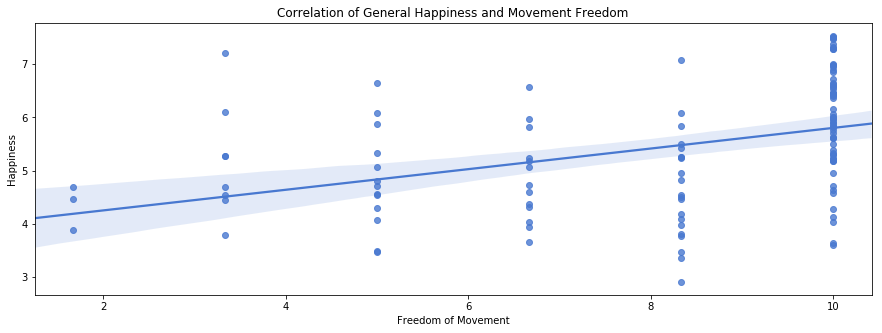

In [15]:
# retrieve movement data from Human Freedom Index grouped by country and ordered by movement score
hfi_movement_by_country_raw = """
    SELECT 
        countries AS 'Country', 
        pf_movement AS 'Freedom of Movement', 
        pf_movement_domestic AS 'Domestic Movement', 
        pf_movement_foreign AS 'Foreign Movement', 
        pf_movement_women AS 'Womens Movement' 
    FROM 'Human Freedom Index' 
    GROUP BY countries 
    ORDER BY pf_score DESC
"""

# pull data from table and drop N/A values
hfi_movement_by_country_data = pd.read_sql(hfi_movement_by_country_raw, con=engine)
hfi_movement_by_country = hfi_movement_by_country_data.dropna()

# coombine the two dataframes grouping by county and dropping null values
hfi_movement_whr_happiness_by_country_combined = pd.concat([hfi_movement_by_country, whr], sort=True)
hfi_movement_whr_happiness_by_country_grouped = hfi_movement_whr_happiness_by_country_combined.groupby("Country")["Happiness", "Freedom of Movement", "Domestic Movement", "Foreign Movement", "Womens Movement"].mean()
hfi_movement_whr_happiness_by_country = hfi_movement_whr_happiness_by_country_grouped.dropna()

# scatter plot analysis with linear regression
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="Freedom of Movement", y="Happiness", data=hfi_movement_whr_happiness_by_country, ax=ax)
ax.set_title("Correlation of General Happiness and Movement Freedom")

x = hfi_movement_whr_happiness_by_country["Freedom of Movement"]
y = hfi_movement_whr_happiness_by_country["Happiness"]
linregress(x,y)

Slope = 0.19   
Correlation Coefficient = 0.40

Movment freedom shows a moderate correlation but less than expected.

Let's now look at the subcategories of movement freedom: domestic, foreign, and women's.

### Happiness and types of movement  

* Subcategories: Domestic, foreign, and women's movement freedom

Text(0.5,0.98,'Happiness and Freedom of Movement')

LinregressResult(slope=0.19384737724068232, intercept=3.865210669228947, rvalue=0.40395224050215855, pvalue=3.948639184319359e-06, stderr=0.0400733806885717)

LinregressResult(slope=0.12524635510928528, intercept=4.486462509188343, rvalue=0.3986688491682361, pvalue=5.41240705840397e-06, stderr=0.026301255055421024)

LinregressResult(slope=0.09322213476133365, intercept=4.733206502033217, rvalue=0.2967332753905574, pvalue=0.0009038423009149428, stderr=0.02738719365529842)

LinregressResult(slope=0.11382046038111927, intercept=4.411231037694739, rvalue=0.18839487581167114, pvalue=0.0376988147725481, stderr=0.05416433358800328)

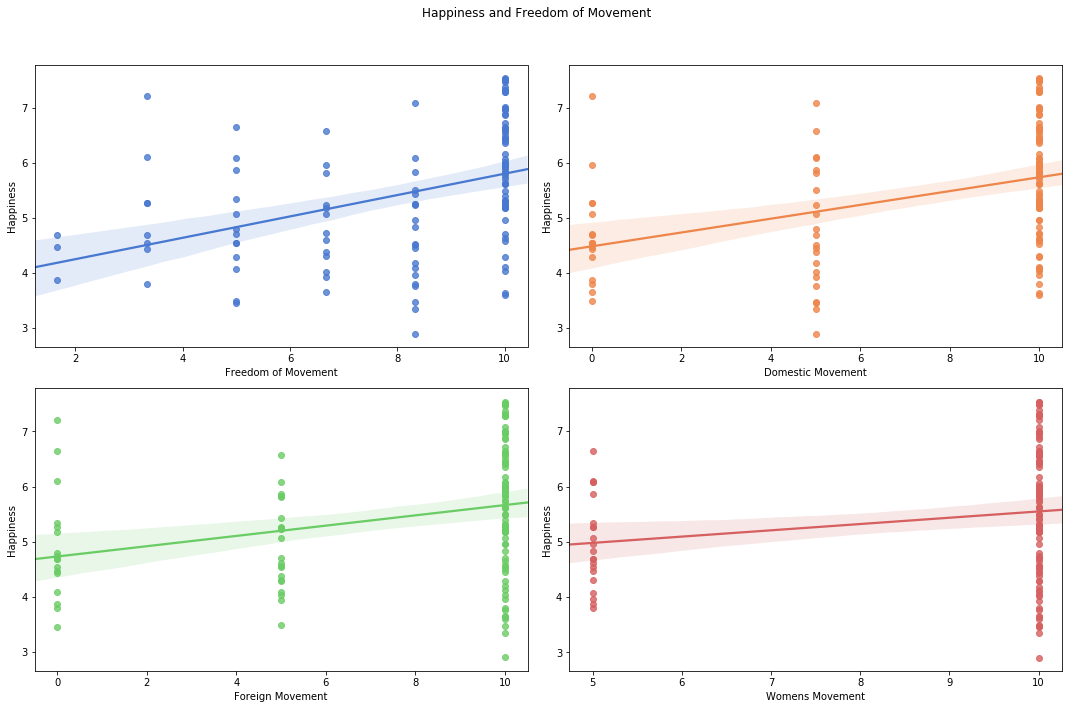

In [16]:
# Correlation of happiness and all movement freedom types

# plot of happiness freedom and personal freedom subtypes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle("Happiness and Freedom of Movement")
sns.regplot(x="Freedom of Movement", y="Happiness", data=hfi_movement_whr_happiness_by_country, ax=axes[0,0])
sns.regplot(x="Domestic Movement", y="Happiness", data=hfi_movement_whr_happiness_by_country, ax=axes[0,1])
sns.regplot(x="Foreign Movement", y="Happiness", data=hfi_movement_whr_happiness_by_country, ax=axes[1,0])
sns.regplot(x="Womens Movement", y="Happiness", data=hfi_movement_whr_happiness_by_country, ax=axes[1,1])

plt.tight_layout()
fig.subplots_adjust(top=0.9)

# slope and correlation coefficient of happiness and personal freedom
x = hfi_movement_whr_happiness_by_country["Freedom of Movement"]
y = hfi_movement_whr_happiness_by_country["Happiness"]
linregress(x,y)

x = hfi_movement_whr_happiness_by_country["Domestic Movement"]
y = hfi_movement_whr_happiness_by_country["Happiness"]
linregress(x,y)

x = hfi_movement_whr_happiness_by_country["Foreign Movement"]
y = hfi_movement_whr_happiness_by_country["Happiness"]
linregress(x,y)

x = hfi_movement_whr_happiness_by_country["Womens Movement"]
y = hfi_movement_whr_happiness_by_country["Happiness"]
linregress(x,y)

#### Analysis:

**Weak to moderate**:  Domestic Travel (0.40), Foreign Travel (0.30), Women's Movement (0.19) 

Domestic travel has the strongest correlation with happiness which seems to be a benefit for landlocked countries as international travel would be more restricted than in coastal countries.

#### Happiness, Movement Freedom, and Gender

How is happiness affected by the movement freedom of each gender?

We average each gender's movement freedom for all countries and compare to each other.

Text(0.5,1,'Freedom and Movement Freedom by Gender')

Text(0,0.5,'Freedom')

(5, 10)

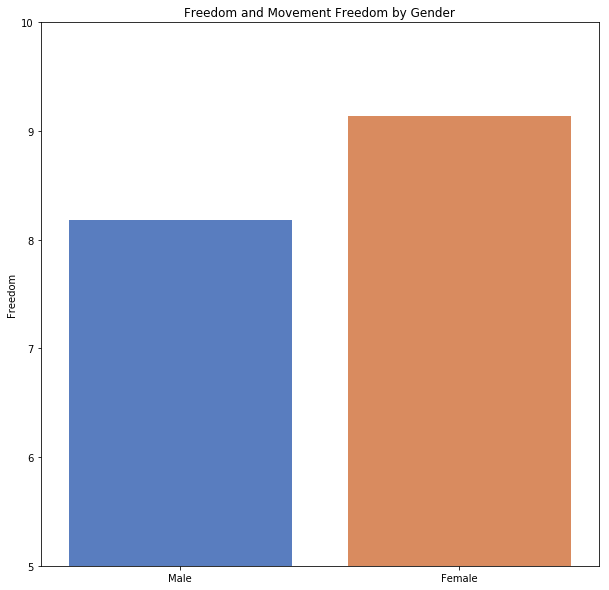

In [17]:
# Comparison of general movement freedom and women's movement freedom
hfi_movement_gender_whr_raw = hfi_movement_whr_happiness_by_country.groupby("Country")["Happiness", "Freedom of Movement", "Womens Movement"].mean()
hfi_movement_gender_whr_dropped = hfi_movement_gender_whr_raw.dropna()
hfi_movement_gender_whr_grouped = hfi_movement_gender_whr_dropped.reset_index().drop(columns=["Country"])
hfi_movement_gender_whr_grouped.columns = ["Happiness", "Male", "Female"]

# avg movment freedom for each gender
male_mean = hfi_movement_gender_whr_grouped["Male"].mean()
female_mean = hfi_movement_gender_whr_grouped["Female"].mean()

# combine average scores into data array and label
combined_gender_mean = pd.DataFrame([male_mean, female_mean]).T 
combined_gender_mean.columns = ["Male", "Female"]
combined_gender_mean.index = ["Freedom"]

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=combined_gender_mean);
ax.set_title("Freedom and Movement Freedom by Gender")
ax.set_ylabel("Freedom")
ax.set_ylim(5, 10)

Countries with higher freedom of movement for women average higher happiness scores.

### Happiness and geographic isolation  
* How is happiness affected by the geography of the country? (Coastal versus Landlocked)

In [18]:
# get list of landlocked countries
landlocked_countries = pd.Series(["Afghanistan", "Andorra", "Armenia", "Artsakh", "Austria", "Azerbaijan", "Belarus", "Bhutan", "Bolivia", "Botswana", "Burkina Faso", "Burundi", "Central African Republic", "Chad", "Czech Republic", "Ethiopia", "Hungary","Kazakhstan", "Kosovo", "Kyrgyzstan", "Laos", "Lesotho", "Liechtenstein", "Luxembourg", "Macedonia", "Malawi", "Mali", "Moldova", "Mongolia", "Nepal", "Niger", "Paraguay", "Rwanda", "San Marino" , "Serbia", "Slovakia", "South Ossetia", "South Sudan", "Swaziland", "Switzerland","Tajikistan", "Transnistria", "Turkmenistan", "Uganda", "Uzbekistan","Vatican City", "West Bank", "Zambia", "Zimbabwe"])


Text(0.5,1,'Happiness range in countries based on geography')

(0, 10)

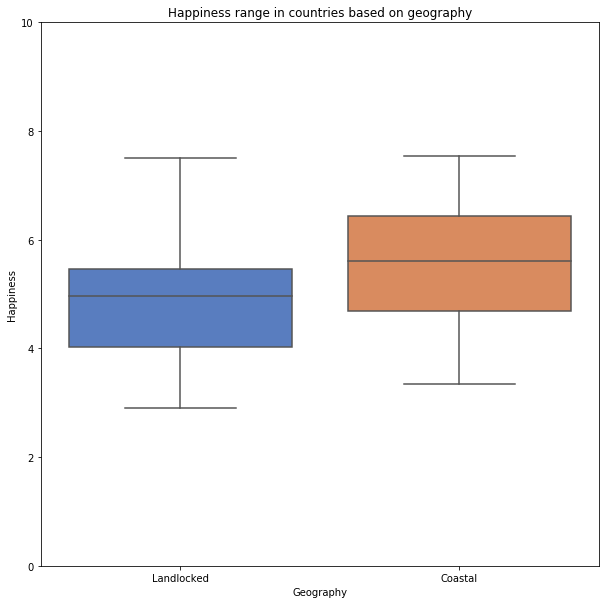

In [19]:
# create list of land-locked countries and coastal countries
landlocked_happiness = hf_wh_scores_by_country_raw.loc[hf_wh_scores_by_country_raw["Country"].isin(landlocked_countries)]
coastal_happiness = hf_wh_scores_by_country_raw.loc[~hf_wh_scores_by_country_raw["Country"].isin(landlocked_countries)]

# combine dataframes
combined_happiness_raw = pd.concat([landlocked_happiness, coastal_happiness])
combined_happiness = combined_happiness_raw.drop(columns=["Combined Score"])

# mark countries as landlocked or coastal
combined_happiness["Geography"] = ""
combined_happiness["Geography"] = np.where(combined_happiness["Country"].isin(landlocked_countries), "Landlocked", "Coastal")
combined_happiness = combined_happiness.sort_values(by="Happiness").drop(columns=["Country"])

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="Geography", y="Happiness", data=combined_happiness)
ax.set_title("Happiness range in countries based on geography")
ax.set_ylim(0, 10)

Text(0.5,1,'Happiness in Landlocked vs Coastal Countries')

(0, 10)

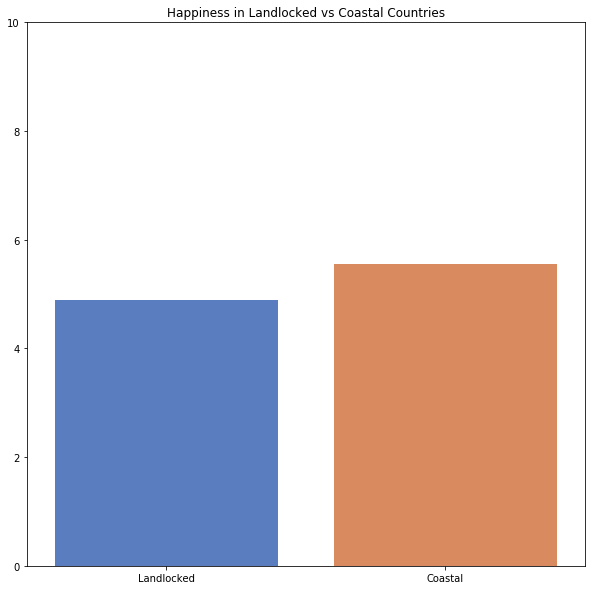

In [20]:
# avg happiness in landlocked vs coastal countries
landlocked_happiness_mean = landlocked_happiness["Happiness"].mean()
coastal_happiness_mean = coastal_happiness["Happiness"].mean()

# combine into data array and traverse rows to columns (single happiness row, typed columns)
combined_happiness_mean = pd.DataFrame([landlocked_happiness_mean, coastal_happiness_mean]).T 

combined_happiness_mean.columns = ["Landlocked", "Coastal"]
combined_happiness_mean.index = ["Happiness"]

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=combined_happiness_mean);
ax.set_title("Happiness in Landlocked vs Coastal Countries")
ax.set_ylim(0, 10)

Happiness in coastal countries seems to average higher than landlocked countries although there is a lot of overlap.

Text(0.5,1,'Correlation of Happiness and Freedom in Landlocked vs Coastal')

LinregressResult(slope=0.8786316163050915, intercept=-1.0922589058503362, rvalue=0.7158647604073939, pvalue=8.687374465791945e-06, stderr=0.16195744036889148)

LinregressResult(slope=0.6303437707662627, intercept=1.1371292209288013, rvalue=0.6179284067523297, pvalue=2.1823642234112312e-12, stderr=0.0790264944123492)

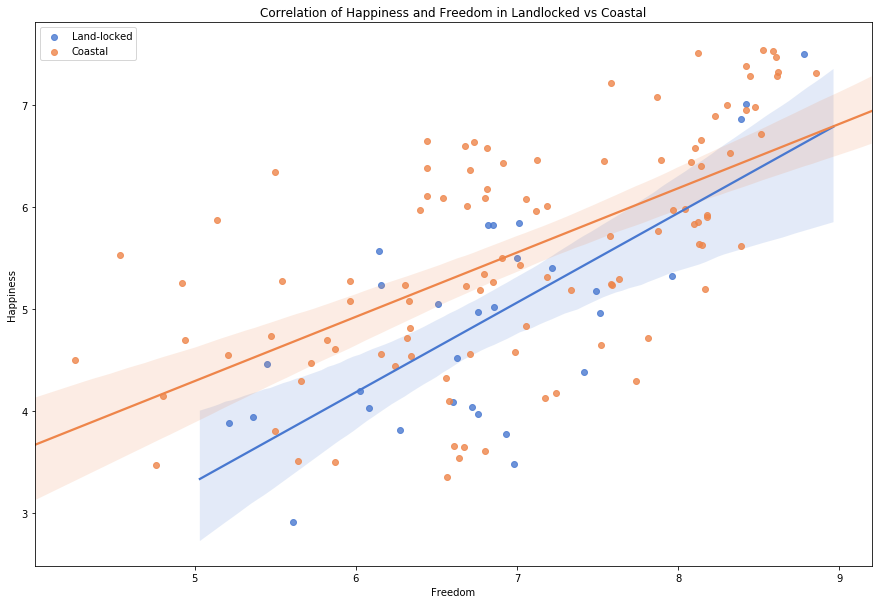

In [21]:
# Regplots of happiness and freedom for landlocked vs coastal countries
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x="Freedom", y="Happiness", data=landlocked_happiness, label="Land-locked")
sns.regplot(x="Freedom", y="Happiness", data=coastal_happiness, label="Coastal")
ax.set_title("Correlation of Happiness and Freedom in Landlocked vs Coastal")
ax.legend()

# slope and correlation coefficient of happiness and personal freedom
x = landlocked_happiness["Freedom"]
y = landlocked_happiness["Happiness"]
linregress(x,y)

x = coastal_happiness["Freedom"]
y = coastal_happiness["Happiness"]
linregress(x,y)

There seems to be a larger difference in happiness between coastal and landlocked countries with low freedom scores.  However, at the top freedom levels, this effect seems to be non-existant.

#### Happiness and movement freedom in land-locked versus coastal countries

Text(0.5,1,'Correlation of Happiness and Freedom of Movement in Landlocked vs non-Landlocked countries')

Text(0.5,0,'Freedom of Movement')

Text(0,0.5,'Happiness')

LinregressResult(slope=0.2634076329039947, intercept=2.6653812897946585, rvalue=0.4509848188048423, pvalue=0.018226123164837238, stderr=0.10426055671413943)

LinregressResult(slope=0.18566767450354887, intercept=4.109416343979116, rvalue=0.42531559049079953, pvalue=1.7355633151802674e-05, stderr=0.0409688474579896)

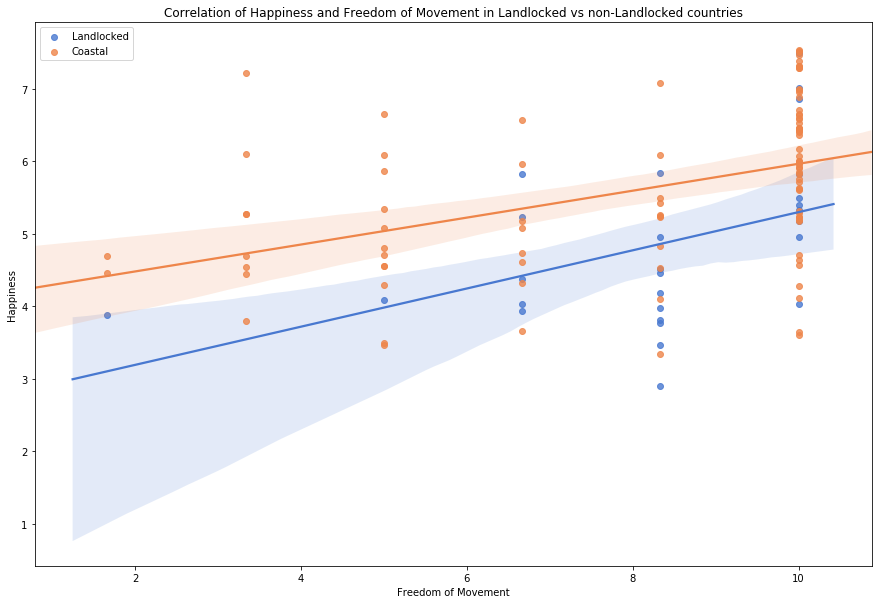

In [22]:
# reset index of dataframe from country list to index
hfi_movement_whr_happiness_by_country_reset = hfi_movement_whr_happiness_by_country.reset_index()
hfi_movement_whr_happiness_by_country_reset.rename(columns={'countries':'Country'}, inplace=True)

# create list of land-locked countries and coastal countries
landlocked_movement_happiness = hfi_movement_whr_happiness_by_country_reset.loc[hfi_movement_whr_happiness_by_country_reset["Country"].isin(landlocked_countries)]
coastal_movement_happiness = hfi_movement_whr_happiness_by_country_reset.loc[~hfi_movement_whr_happiness_by_country_reset["Country"].isin(landlocked_countries)]

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x="Freedom of Movement", y="Happiness", data=landlocked_movement_happiness, label="Landlocked")
sns.regplot(x="Freedom of Movement", y="Happiness", data=coastal_movement_happiness, label="Coastal")
ax.set_title("Correlation of Happiness and Freedom of Movement in Landlocked vs non-Landlocked countries")
ax.set_xlabel("Freedom of Movement")
ax.set_ylabel("Happiness")
ax.legend()

# slope and correlation coefficient of happiness and personal freedom
x = landlocked_movement_happiness["Freedom of Movement"]
y = landlocked_movement_happiness["Happiness"]
linregress(x,y)

x = coastal_movement_happiness["Freedom of Movement"]
y = coastal_movement_happiness["Happiness"]
linregress(x,y)


**Land-locked:**
Correllation Coefficient: 0.45  
**Coastal**
Correllation Coefficient: 0.43

There seems to be no noticable difference between coastal and landlocked countries in relation to movement freedom of individuals.

### Conclusions

We started off with the assumption that happiness and freedom are positively correlated and this was confirmed early on.  

Diving deeper into the data, we found that Rule of Law, Legal, Money, and Trade are the strongest correlates with overall happiness.

Movement freedom does have a moderate effect on happiness although it is less than expected.

Geographic isolation seems to have an effect when overall freedom is low but the effect seems to disappear in the top scoring countries.